<a href="https://colab.research.google.com/github/ngudala/data-5160-01/blob/main/Data_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Data Manipulation with Pandas

Compiled by Jason Eden



This notebook based loosely on a few example notebooks provided by Google Colab, including an introduction to Pandas. Original version:

https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb

Please refer to the original for more in-depth explanations of some of the concepts demonstrated below.

## Import Pandas and Enable Interactive Dataframes

We are going to demonstrate Pandas, as well as an interactive data table feature in Google Colab. We will start by importing Pandas as "pd." This allows us to run Pandas commands later by calling pd.[some function].

In [1]:
import pandas as pd

Google Colab supports a feature that enables us to interact with Pandas dataframes for some EDA purposes. Learn more here:

https://colab.research.google.com/notebooks/data_table.ipynb

To enable it, run the code below:

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

## Upload a File, Rename It, and Load a Subset into Pandas for Preview Purposes

There are a couple of ways to get data into Colab for manipulation. First, you can upload it directly by running the code below. This generates a Choose Files button, which allows you to choose a file and upload it to your runtime.

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Copy of Nutrition__Physical_Activity__and_Obesity_-_Youth_Risk_Behavior_Surveillance_System.csv to Copy of Nutrition__Physical_Activity__and_Obesity_-_Youth_Risk_Behavior_Surveillance_System (1).csv
User uploaded file "Copy of Nutrition__Physical_Activity__and_Obesity_-_Youth_Risk_Behavior_Surveillance_System (1).csv" with length 13774176 bytes


Let's assume you uploaded a file named "mydatafile.csv" into the Colab runtime. You could then create a Pandas dataframe named "mydataframe" with the following code:

In [5]:
dataframe = pd.read_csv("/content/Copy of Nutrition__Physical_Activity__and_Obesity_-_Youth_Risk_Behavior_Surveillance_System.csv")

In [6]:
dataframe.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL


Dropping Unneeded columns

In [7]:
dataframe.drop(labels=['LocationAbbr','Datasource','Class','Topic','Data_Value_Type','DataValueTypeID','Data_Value_Unit','Data_Value_Footnote_Symbol','Data_Value_Footnote',	'LocationID','Total','Gender','Grade','Race/Ethnicity'],axis = 1,inplace = True)

In [8]:
dataframe.head(2)

,YearStart,YearEnd,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,Alaska,Percent of students in grades 9-12 who achieve...,9.6,9.6,5.5,16.5,130.0,"(64.845079957001, -147.722059036)",PA,PA1,Q048,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,Arizona,Percent of students in grades 9-12 who have ob...,13.3,13.3,10.7,16.5,1739.0,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,Total,Total,OVR,OVERALL


Handling NULL or Infinite Values Use the .dropna() method to remove rows with NULL values

In [9]:
dataframe = dataframe.dropna()

In [10]:
dataframe.head(2)

,YearStart,YearEnd,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,Alaska,Percent of students in grades 9-12 who achieve...,9.6,9.6,5.5,16.5,130.0,"(64.845079957001, -147.722059036)",PA,PA1,Q048,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,Arizona,Percent of students in grades 9-12 who have ob...,13.3,13.3,10.7,16.5,1739.0,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,Total,Total,OVR,OVERALL


You would need to modify the code above with the actual name you wanted to give to your dataframe as well as the actual name of your .csv file.

Transforming Data Types using the .astype() method or other conversion functions to change data types as needed.


In [11]:
dataframe['YearStart'] = pd.to_datetime(dataframe['YearStart'], format='%Y')
dataframe['YearEnd'] = pd.to_datetime(dataframe['YearEnd'], format = '%Y')
dataframe.head(1)

,YearStart,YearEnd,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019-01-01,2019-01-01,Alaska,Percent of students in grades 9-12 who achieve...,9.6,9.6,5.5,16.5,130.0,"(64.845079957001, -147.722059036)",PA,PA1,Q048,Race/Ethnicity,Asian,RACE,RACEASN


Renaming Columns using the .rename() method to rename columns.

In [12]:
dataframe = dataframe.rename(columns={'LocationDesc': 'Location', 'GeoLocation':'GeoLocationcoordinates'})

In [13]:
dataframe.head(1)

,YearStart,YearEnd,Location,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocationcoordinates,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019-01-01,2019-01-01,Alaska,Percent of students in grades 9-12 who achieve...,9.6,9.6,5.5,16.5,130.0,"(64.845079957001, -147.722059036)",PA,PA1,Q048,Race/Ethnicity,Asian,RACE,RACEASN


Create a new column based on two existing columnsusing simple mathematical operations.
.

In [14]:
dataframe['Period'] = dataframe['YearStart'].astype(str) + '-' + dataframe['YearEnd'].astype(str)
dataframe['Avg_Data_Value'] = dataframe[['Data_Value','Data_Value_Alt']].mean(axis=1)

In [15]:
dataframe.head(1)

,YearStart,YearEnd,Location,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocationcoordinates,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Period,Avg_Data_Value
0,2019-01-01,2019-01-01,Alaska,Percent of students in grades 9-12 who achieve...,9.6,9.6,5.5,16.5,130.0,"(64.845079957001, -147.722059036)",PA,PA1,Q048,Race/Ethnicity,Asian,RACE,RACEASN,2019-01-01-2019-01-01,9.6


In [16]:
dataframe = dataframe.drop(['YearStart', 'YearEnd','Data_Value','Data_Value_Alt'], axis=1)

dataframe.head(1)

,Location,Question,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocationcoordinates,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Period,Avg_Data_Value
0,Alaska,Percent of students in grades 9-12 who achieve...,5.5,16.5,130.0,"(64.845079957001, -147.722059036)",PA,PA1,Q048,Race/Ethnicity,Asian,RACE,RACEASN,2019-01-01-2019-01-01,9.6


Removing Duplicate Rows using the .drop_duplicates() method to remove duplicate rows.

In [17]:
dataframe = dataframe.drop_duplicates()

In [18]:
dataframe.count()

Location                     28486
Question                     28486
Low_Confidence_Limit         28486
High_Confidence_Limit        28486
Sample_Size                  28486
GeoLocationcoordinates       28486
ClassID                      28486
TopicID                      28486
QuestionID                   28486
StratificationCategory1      28486
Stratification1              28486
StratificationCategoryId1    28486
StratificationID1            28486
Period                       28486
Avg_Data_Value               28486
dtype: int64

Save the Cleaned Dataset

In [19]:
dataframe.to_csv('Nutrition__Physical_Activity_Cleaned_Dataset.csv', index=False)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Visualize Outliers

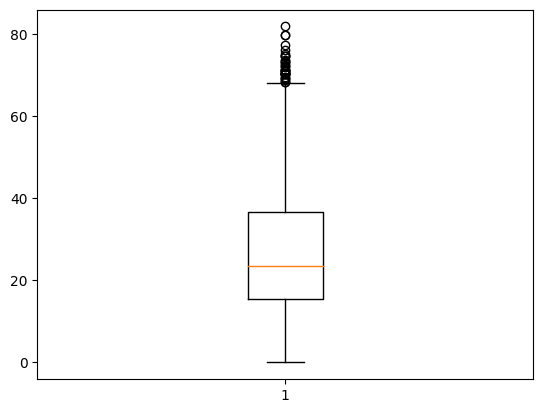

In [21]:
import matplotlib.pyplot as plt

# Box plot
plt.boxplot(dataframe['Avg_Data_Value'])
plt.show()
